In [112]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import datasets


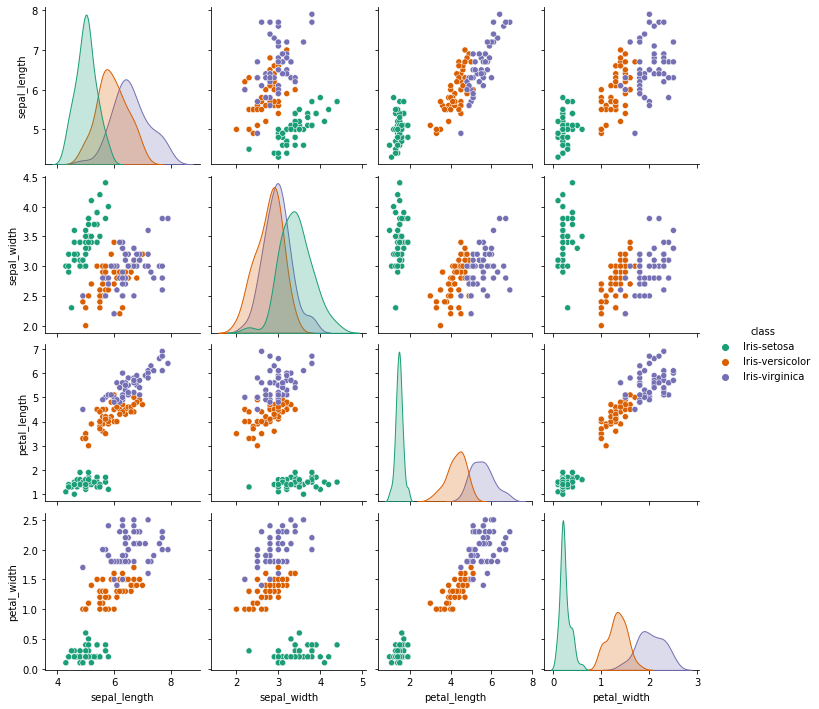

In [3]:
irisdata = pd.read_csv('iris.csv')

sns.pairplot(irisdata,hue='class',palette='Dark2')

In [7]:
irisdata.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
X = irisdata.drop('class', axis=1)  
y = irisdata['class']  
result = dict()
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True)
    
    for i in range(2,15):
        if i not in result:
            result[i] = {'train':[], 'test':[]}
            
        classifier = SVC(kernel='poly', degree=i, gamma="auto")
        classifier.fit(X_train, y_train)

        y_train_pred = classifier.predict(X_train)
        y_pred = classifier.predict(X_test) 
        
        result[i]['train'].append(f1_score(y_train, y_train_pred, average="weighted"))
        result[i]['test'].append(f1_score(y_test, y_pred, average="weighted"))


Text(0, 0.5, 'f1 Score (Weighted)')

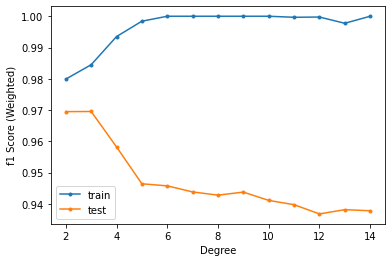

In [109]:
train = [np.mean(x[1]['train']) for x in result.items()]
test = [np.mean(x[1]['test']) for x in result.items()]

plt.plot(range(2,len(train) + 2), train, '.-', label= 'train')
plt.plot(range(2,len(test) + 2), test, '.-', label= 'test')
plt.xlabel('Degree')
plt.legend()
plt.ylabel('f1 Score (Weighted)')


In [120]:
X = irisdata.drop('class', axis=1)  
y = irisdata['class']  
result = dict()
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True)
    
    for i in range(1,20):
        if i not in result:
            result[i] = {'train':[], 'test':[]}
            
        classifier = DecisionTreeClassifier(max_depth=i)
        classifier.fit(X_train, y_train)

        y_train_pred = classifier.predict(X_train)
        y_pred = classifier.predict(X_test) 
        
        result[i]['train'].append(f1_score(y_train, y_train_pred, average="weighted"))
        result[i]['test'].append(f1_score(y_test, y_pred, average="weighted"))


Text(0, 0.5, 'f1 Score (Weighted)')

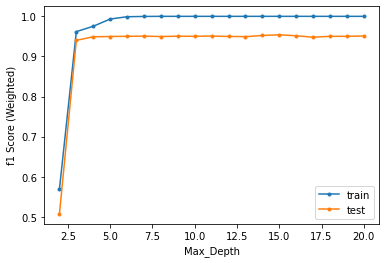

In [121]:
train = [np.mean(x[1]['train']) for x in result.items()]
test = [np.mean(x[1]['test']) for x in result.items()]

plt.plot(range(2,len(train) + 2), train, '.-', label= 'train')
plt.plot(range(2,len(test) + 2), test, '.-', label= 'test')
plt.xlabel('Max_Depth')
plt.legend()
plt.ylabel('f1 Score (Weighted)')


In [134]:
train

[0.5689427724479724,
 0.9618689644966275,
 0.9752320992155312,
 0.9932493825714472,
 0.999000001543671,
 0.999749740369787,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

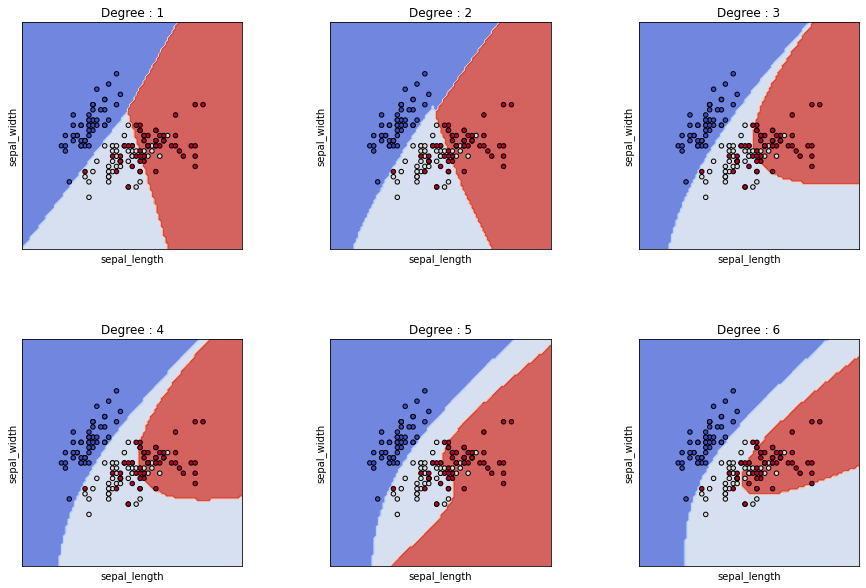

In [12]:
X = np.array(irisdata.drop('class', axis=1))[:, :2]
y = irisdata['class']  
iris = datasets.load_iris()


fig, sub = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]

for degree,ax in zip(range(1,7), sub.flatten()):
    classifier = SVC(kernel='poly', degree=degree, gamma="auto")
    classifier.fit(X, y)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=irisdata.columns[0],
        ylabel=irisdata.columns[1],
    )    
    ax.scatter(X0, X1, c=iris.target, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'Degree : {degree}')
plt.show()
    

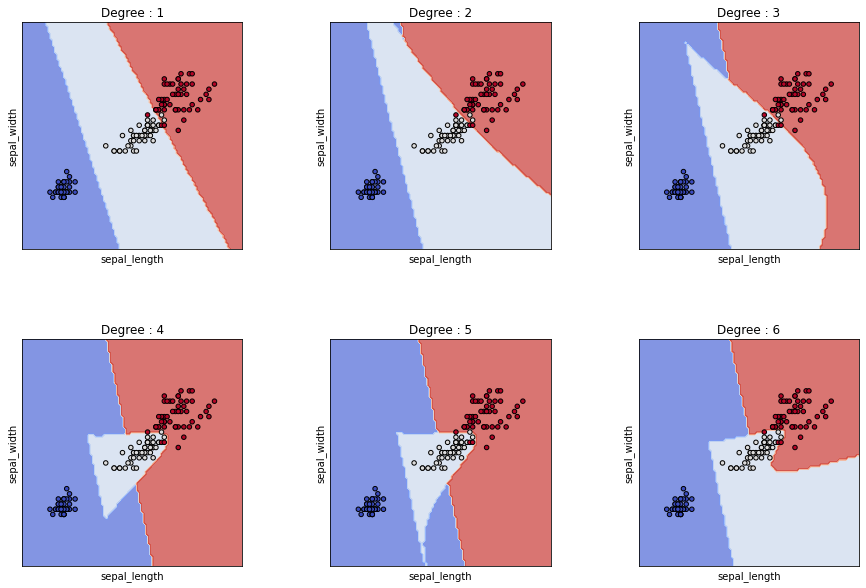

In [67]:
X = np.array(irisdata.drop('class', axis=1))[:, 2:4]
y = irisdata['class']  
iris = datasets.load_iris()


fig, sub = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]

for degree,ax in zip(range(1,7), sub.flatten()):
    classifier = SVC(kernel='poly', degree=degree, gamma="auto")
    classifier.fit(X, y)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.7,
        ax=ax,
        xlabel=irisdata.columns[0],
        ylabel=irisdata.columns[1],
    )    
    ax.scatter(X0, X1, c=iris.target, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'Degree : {degree}')
plt.show()
    


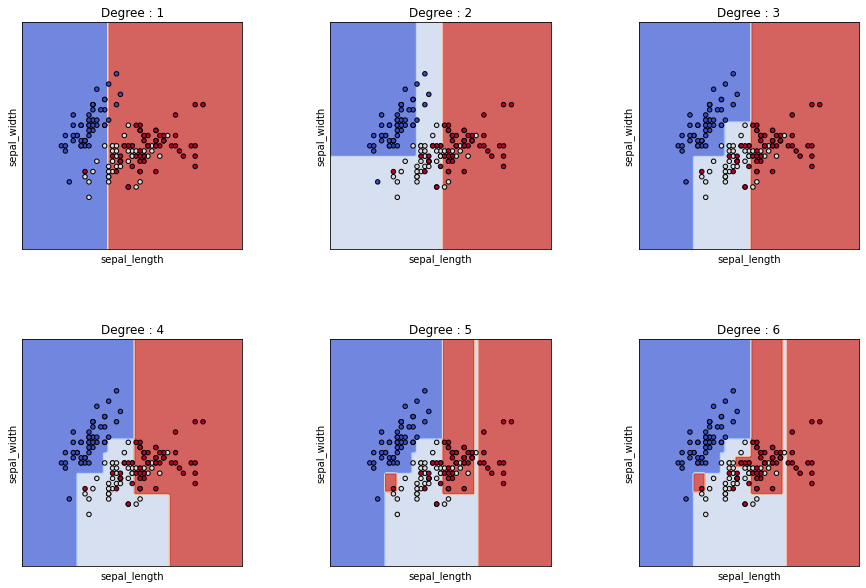

In [127]:
X = np.array(irisdata.drop('class', axis=1))[:, :2]
y = irisdata['class']  
iris = datasets.load_iris()


fig, sub = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]

for degree,ax in zip(range(1,7), sub.flatten()):
    classifier = DecisionTreeClassifier(max_depth=degree)
    classifier.fit(X, y)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=irisdata.columns[0],
        ylabel=irisdata.columns[1],
    )    
    ax.scatter(X0, X1, c=iris.target, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'Degree : {degree}')
plt.show()
    

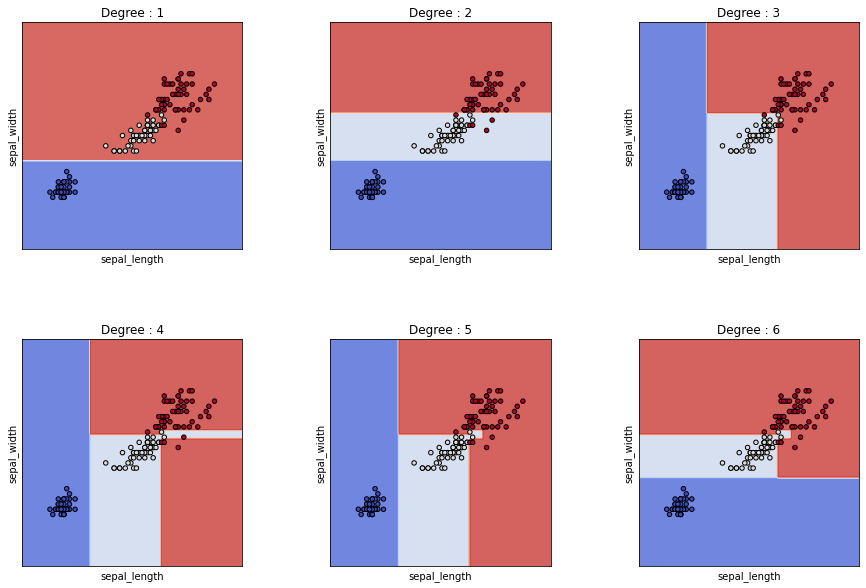

In [130]:
X = np.array(irisdata.drop('class', axis=1))[:, 2:4]
y = irisdata['class']  
iris = datasets.load_iris()


fig, sub = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]

for degree,ax in zip(range(1,7), sub.flatten()):
    classifier = DecisionTreeClassifier(max_depth=degree)
    classifier.fit(X, y)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=irisdata.columns[0],
        ylabel=irisdata.columns[1],
    )    
    ax.scatter(X0, X1, c=iris.target, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'Degree : {degree}')
plt.show()
    